<a href="https://colab.research.google.com/github/yousefabdalla28/Automated_EDA/blob/master/IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  IRIS FLOWER CLASSIFICATION BY YOUSEF ABDALLA



Iris flower has three species ;


1.   setosa
2.   versicolor
3.   virginica


*   which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here my task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.


   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import accuracy_score
import os

# Loading the data

In [2]:
df=pd.read_csv("/content/Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df = df.drop(columns = ['Id'])
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Preprocessing

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# EDA

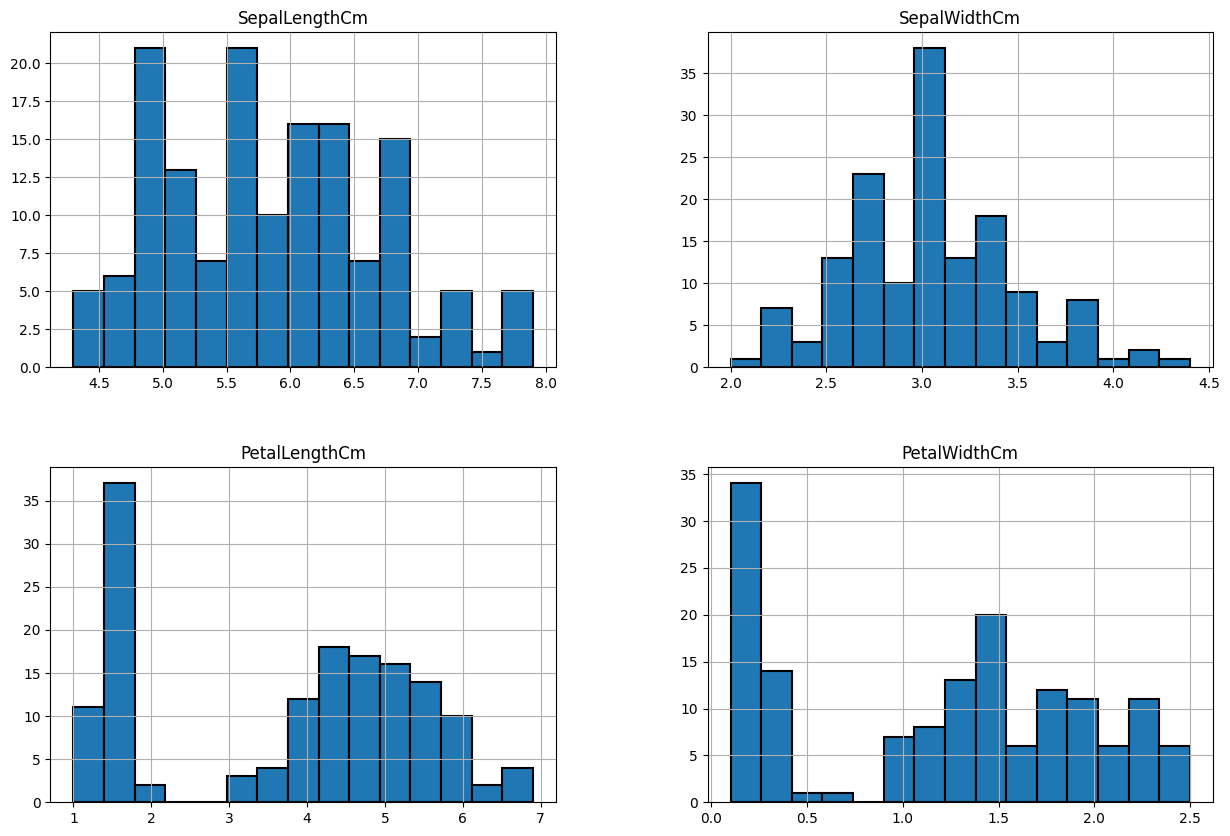

In [9]:
df.hist(bins=15, edgecolor='black', linewidth=1.5, figsize=(15,10))
plt.show()


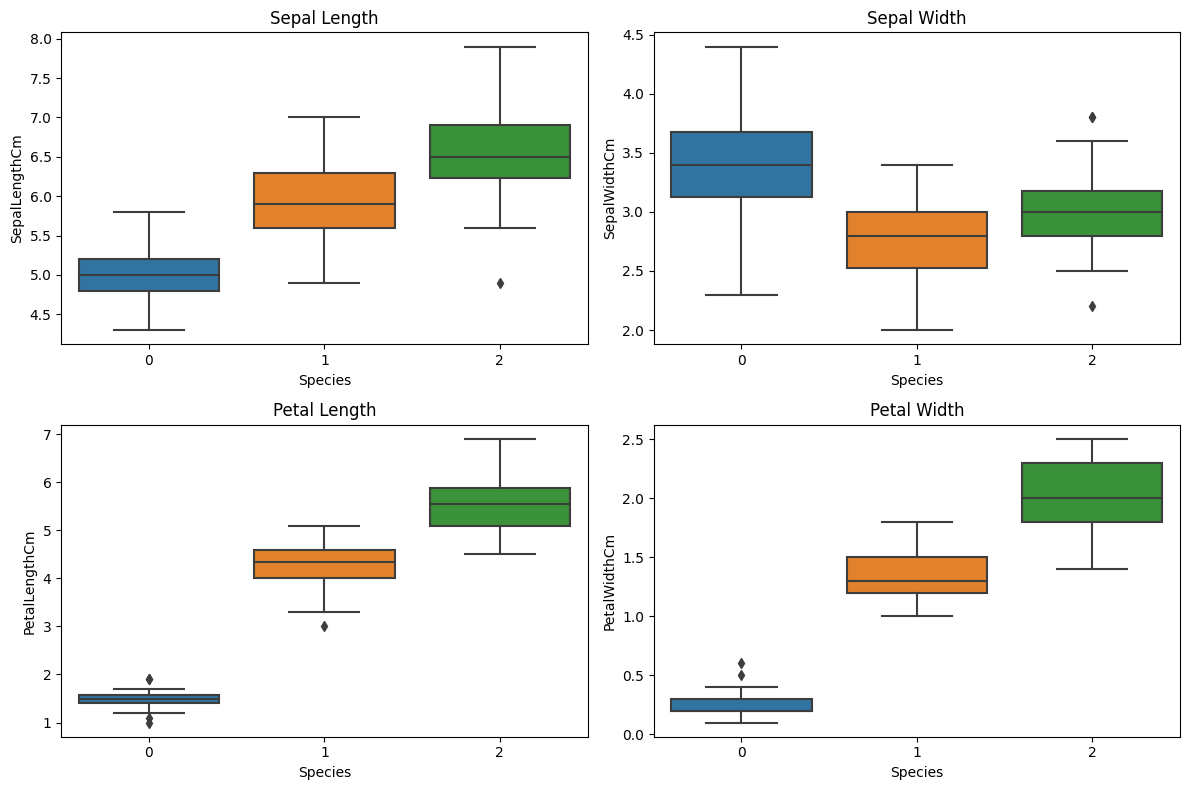

In [30]:
# Distribution of the dataset according to the species
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
plt.title("Sepal Length")
sns.boxplot(y="SepalLengthCm", x="Species", data=df)
plt.subplot(2,2,2)
plt.title("Sepal Width")
sns.boxplot(y="SepalWidthCm", x="Species", data=df)
plt.subplot(2,2,3)
plt.title("Petal Length")
sns.boxplot(y="PetalLengthCm", x="Species", data=df)
plt.subplot(2,2,4)
plt.title("Petal Width")
sns.boxplot(y="PetalWidthCm", x="Species", data=df)
plt.tight_layout()
plt.show()


In [14]:
df.corr()


<ipython-input-14-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<ipython-input-15-510b9b2003ba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

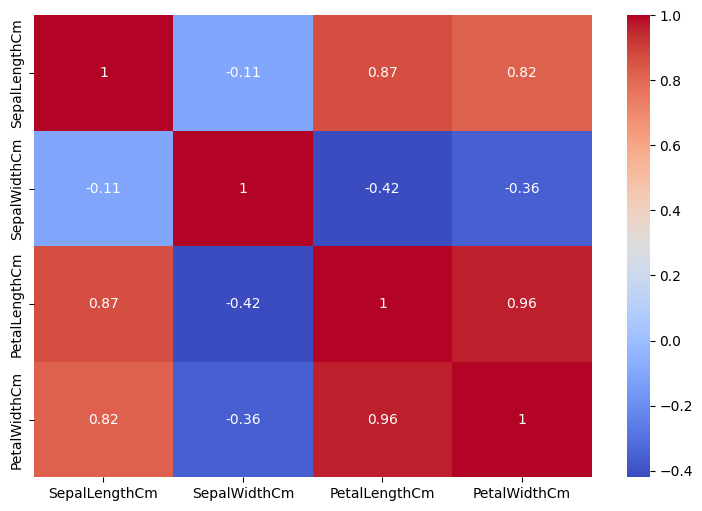

In [15]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')


# Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder  = LabelEncoder()


In [17]:
df['Species'] = encoder.fit_transform(df['Species'])
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [18]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species','SepalWidthCm'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)


# Logistic Regression


In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [20]:
model.fit(x_train, y_train)


LogisticRegression()

In [21]:
print("Accuracy: ",model.score(x_test, y_test) * 100)


Accuracy:  97.77777777777777


#  KNN


In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [23]:
model.fit(x_train, y_train)


KNeighborsClassifier()

In [24]:
print("Accuracy: ",model.score(x_test, y_test) * 100)


Accuracy:  97.77777777777777


# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()


In [26]:
model.fit(x_train, y_train)


DecisionTreeClassifier()

In [27]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556
